In [1]:
from keras import layers, models
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
from sklearn.metrics import f1_score, accuracy_score

Using TensorFlow backend.


In [2]:
def get_model():
    input_tensor = Input(shape=(96, 48, 1), dtype='float32', name='input')
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(4096, kernel_initializer='he_normal')(x)
    x = layers.Dense(4096, kernel_initializer='he_normal')(x)
    output_tensor = layers.Dense(3, activation='softmax')(x)
    
    myvgg = Model(input_tensor, output_tensor)
    myvgg.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
    myvgg.summary()
    return myvgg

In [3]:
model = get_model()
file_path="my_ecg.h5"
model.load_weights(file_path)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 96, 48, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 48, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 24, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 12, 128)       0   

In [4]:
Test = io.loadmat('./testImg_half.mat')
X, y = Test['data'], Test['label']

types = {'nor ': 0, 'rbbb': 1, 'lbbb': 2}

tmp = []
for i in y:
    tmp.append(types[i])
y = np.array(tmp)

In [5]:


X_reshape = X.reshape(X.shape[0], 96, 48, 1)
X_reshape[0:1].shape
pred_test = model.predict(X_reshape[0:1])

In [8]:
pred_test = model.predict(X_reshape)
pred_test = np.argmax(pred_test, axis=-1)

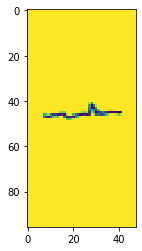

원본라벨:  0
예측라벨:  2


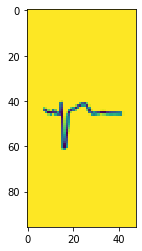

원본라벨:  0
예측라벨:  2


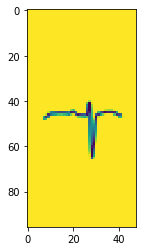

원본라벨:  0
예측라벨:  2


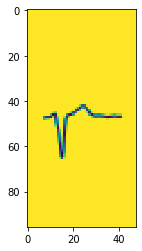

원본라벨:  2
예측라벨:  0


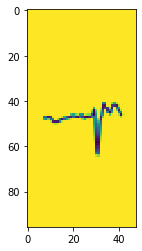

원본라벨:  0
예측라벨:  2


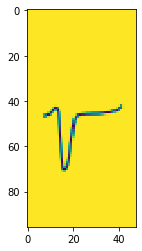

원본라벨:  0
예측라벨:  2


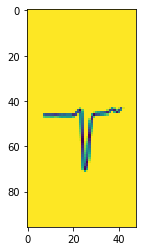

원본라벨:  0
예측라벨:  2


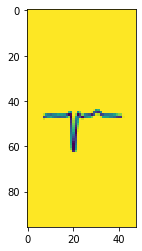

원본라벨:  2
예측라벨:  0


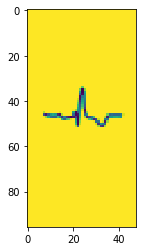

원본라벨:  1
예측라벨:  0


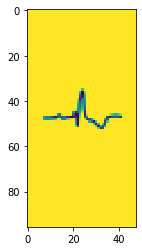

원본라벨:  1
예측라벨:  0


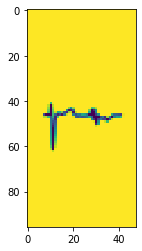

원본라벨:  2
예측라벨:  0


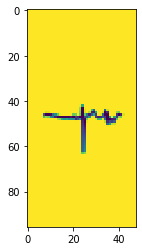

원본라벨:  2
예측라벨:  0


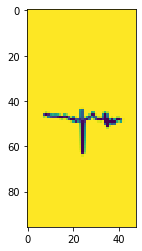

원본라벨:  2
예측라벨:  0


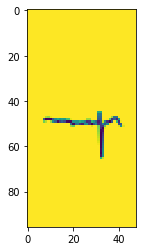

원본라벨:  2
예측라벨:  0


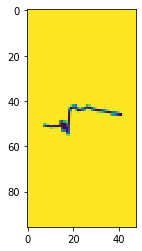

원본라벨:  2
예측라벨:  0


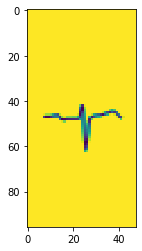

원본라벨:  2
예측라벨:  0


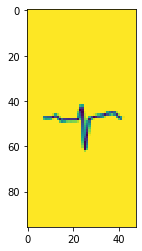

원본라벨:  2
예측라벨:  0


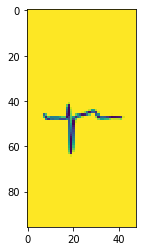

원본라벨:  0
예측라벨:  2


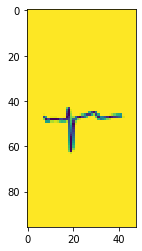

원본라벨:  0
예측라벨:  2


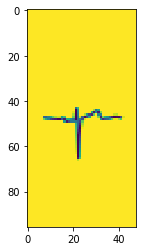

원본라벨:  2
예측라벨:  0


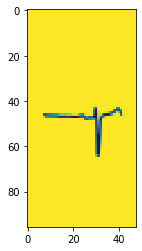

원본라벨:  2
예측라벨:  0


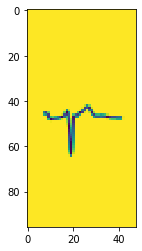

원본라벨:  0
예측라벨:  2


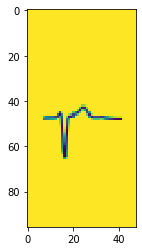

원본라벨:  2
예측라벨:  0


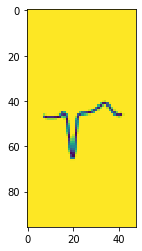

원본라벨:  0
예측라벨:  2


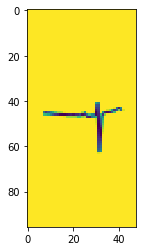

원본라벨:  0
예측라벨:  2


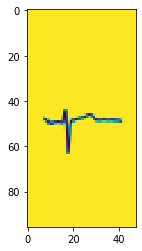

원본라벨:  0
예측라벨:  2


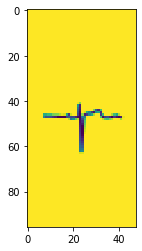

원본라벨:  2
예측라벨:  0


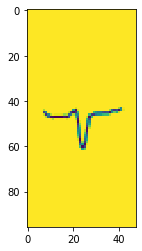

원본라벨:  0
예측라벨:  2


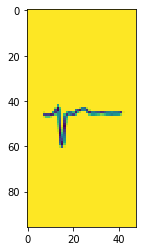

원본라벨:  0
예측라벨:  2


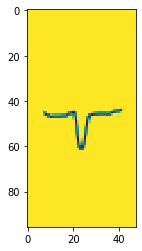

원본라벨:  0
예측라벨:  2


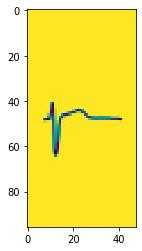

원본라벨:  0
예측라벨:  2


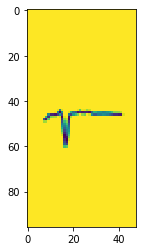

원본라벨:  0
예측라벨:  2


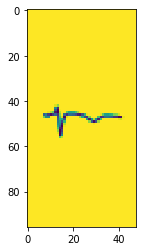

원본라벨:  0
예측라벨:  2


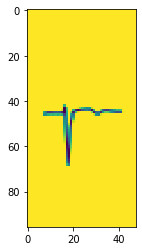

원본라벨:  0
예측라벨:  2


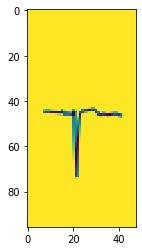

원본라벨:  0
예측라벨:  2


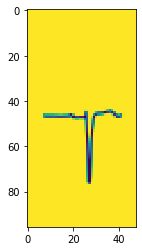

원본라벨:  0
예측라벨:  2


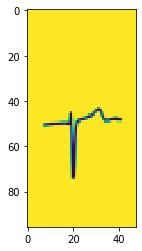

원본라벨:  0
예측라벨:  2


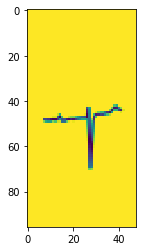

원본라벨:  0
예측라벨:  2


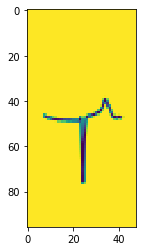

원본라벨:  0
예측라벨:  2


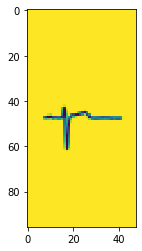

원본라벨:  0
예측라벨:  2


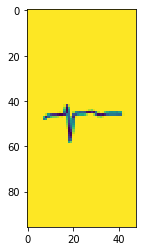

원본라벨:  0
예측라벨:  2


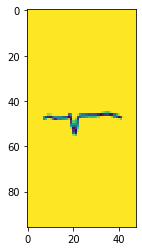

원본라벨:  0
예측라벨:  2


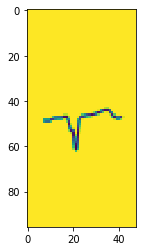

원본라벨:  0
예측라벨:  2


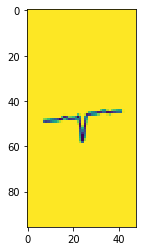

원본라벨:  0
예측라벨:  2


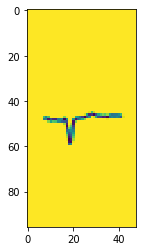

원본라벨:  0
예측라벨:  2


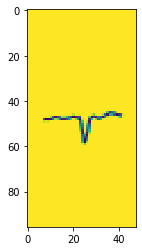

원본라벨:  0
예측라벨:  2


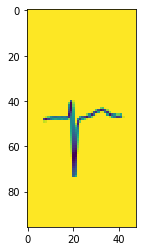

원본라벨:  0
예측라벨:  2


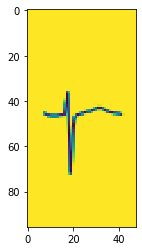

원본라벨:  0
예측라벨:  2


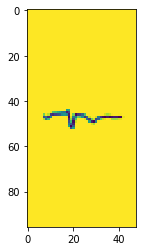

원본라벨:  0
예측라벨:  2


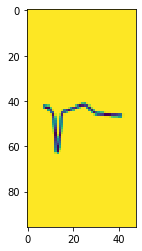

원본라벨:  2
예측라벨:  0


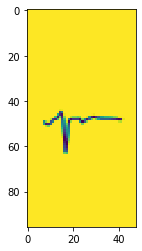

원본라벨:  0
예측라벨:  2


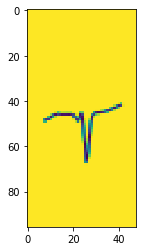

원본라벨:  0
예측라벨:  2


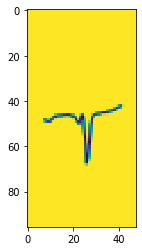

원본라벨:  0
예측라벨:  2


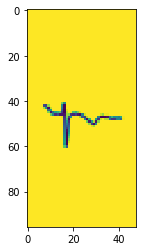

원본라벨:  0
예측라벨:  2


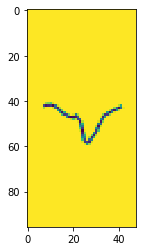

원본라벨:  2
예측라벨:  1


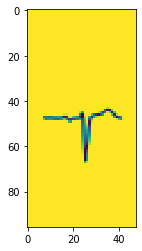

원본라벨:  2
예측라벨:  0


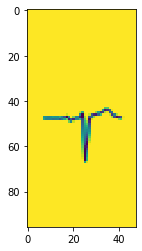

원본라벨:  2
예측라벨:  0


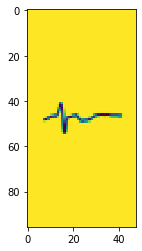

원본라벨:  0
예측라벨:  2


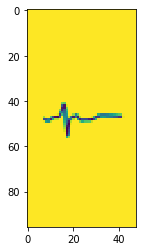

원본라벨:  0
예측라벨:  2


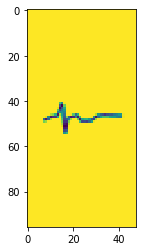

원본라벨:  0
예측라벨:  2


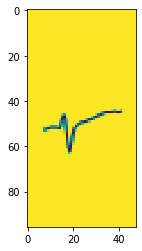

원본라벨:  0
예측라벨:  2


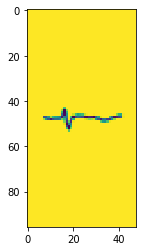

원본라벨:  0
예측라벨:  2


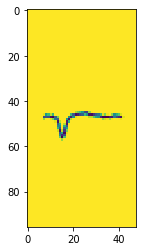

원본라벨:  2
예측라벨:  0


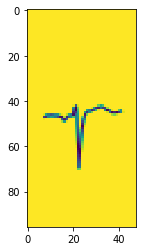

원본라벨:  2
예측라벨:  0


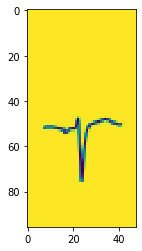

원본라벨:  2
예측라벨:  0


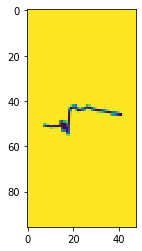

원본라벨:  2
예측라벨:  0


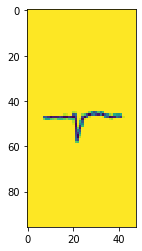

원본라벨:  2
예측라벨:  0


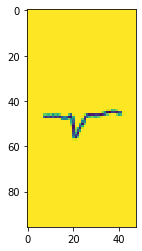

원본라벨:  0
예측라벨:  2


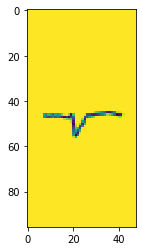

원본라벨:  0
예측라벨:  2


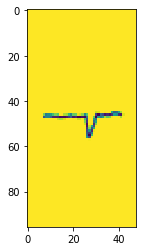

원본라벨:  0
예측라벨:  2


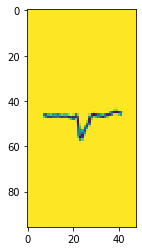

원본라벨:  0
예측라벨:  2


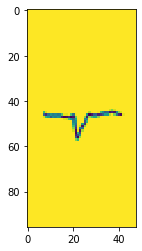

원본라벨:  0
예측라벨:  2


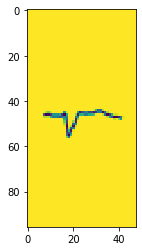

원본라벨:  0
예측라벨:  2


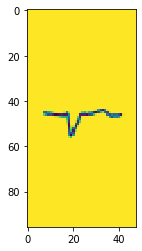

원본라벨:  0
예측라벨:  2


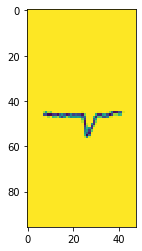

원본라벨:  0
예측라벨:  2


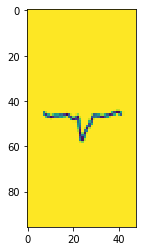

원본라벨:  0
예측라벨:  2


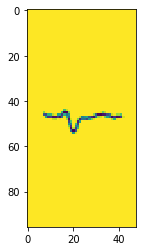

원본라벨:  0
예측라벨:  2


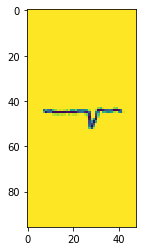

원본라벨:  2
예측라벨:  0


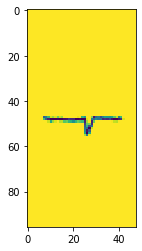

원본라벨:  2
예측라벨:  0


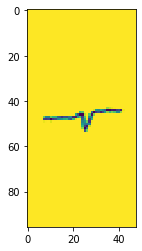

원본라벨:  2
예측라벨:  0


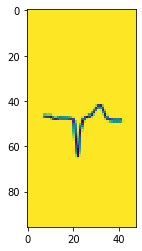

원본라벨:  0
예측라벨:  2


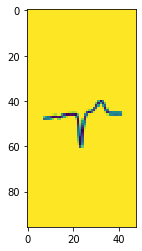

원본라벨:  0
예측라벨:  2


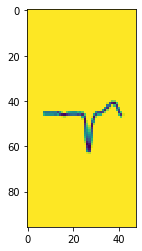

원본라벨:  0
예측라벨:  2


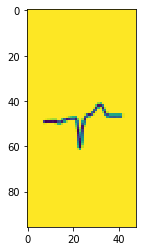

원본라벨:  0
예측라벨:  2


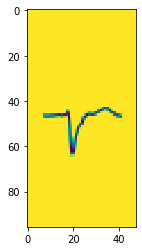

원본라벨:  1
예측라벨:  2


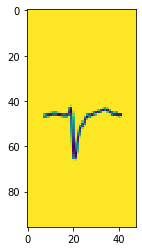

원본라벨:  1
예측라벨:  2


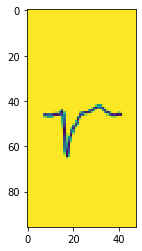

원본라벨:  1
예측라벨:  2


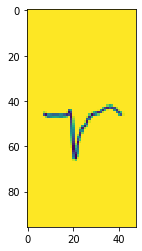

원본라벨:  1
예측라벨:  2


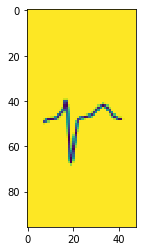

원본라벨:  0
예측라벨:  2


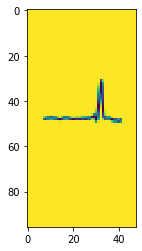

원본라벨:  1
예측라벨:  0


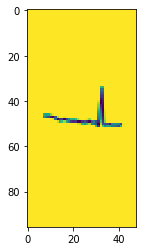

원본라벨:  1
예측라벨:  0


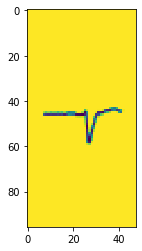

원본라벨:  0
예측라벨:  2


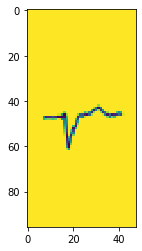

원본라벨:  0
예측라벨:  2


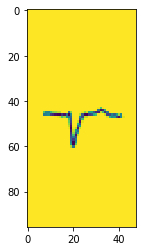

원본라벨:  0
예측라벨:  2


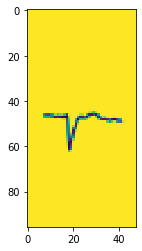

원본라벨:  0
예측라벨:  2


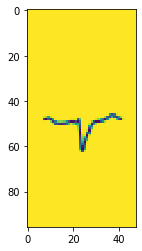

원본라벨:  0
예측라벨:  2


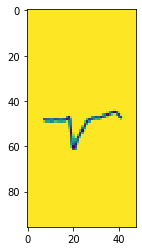

원본라벨:  0
예측라벨:  2


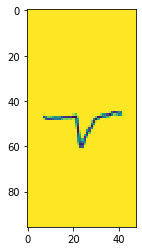

원본라벨:  0
예측라벨:  2


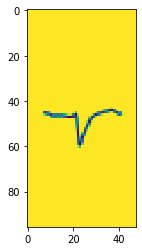

원본라벨:  0
예측라벨:  2


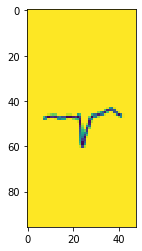

원본라벨:  0
예측라벨:  2


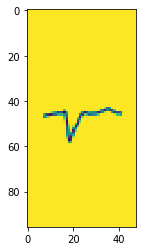

원본라벨:  0
예측라벨:  2


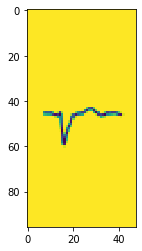

원본라벨:  0
예측라벨:  2


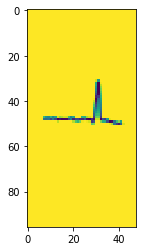

원본라벨:  0
예측라벨:  1


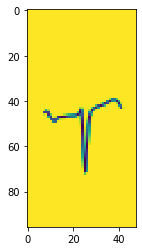

원본라벨:  0
예측라벨:  2


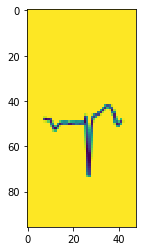

원본라벨:  0
예측라벨:  2


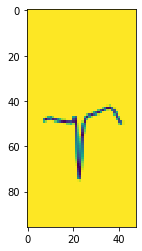

원본라벨:  0
예측라벨:  2


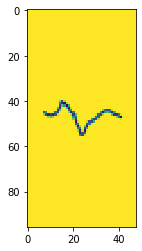

원본라벨:  1
예측라벨:  2


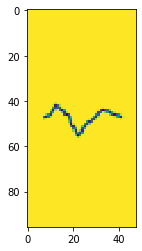

원본라벨:  1
예측라벨:  2


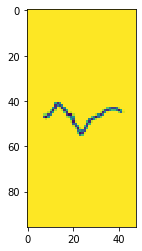

원본라벨:  1
예측라벨:  2


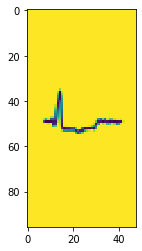

원본라벨:  0
예측라벨:  2


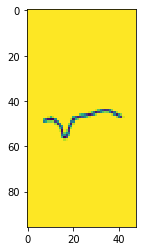

원본라벨:  0
예측라벨:  2


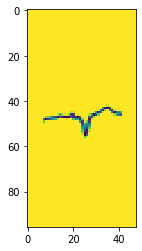

원본라벨:  0
예측라벨:  2


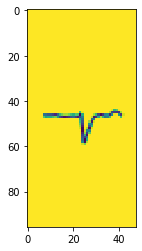

원본라벨:  0
예측라벨:  2


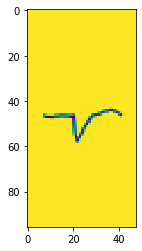

원본라벨:  0
예측라벨:  2


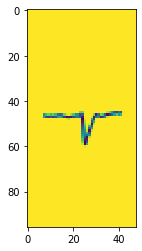

원본라벨:  0
예측라벨:  2


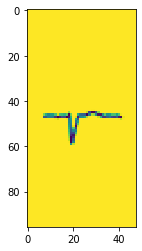

원본라벨:  0
예측라벨:  2


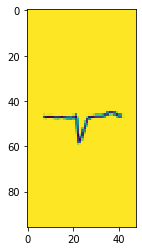

원본라벨:  0
예측라벨:  2


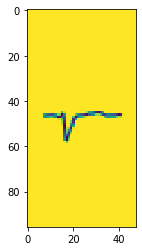

원본라벨:  0
예측라벨:  2


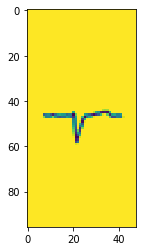

원본라벨:  0
예측라벨:  2


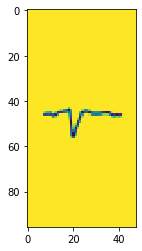

원본라벨:  0
예측라벨:  2


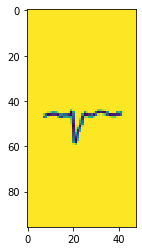

원본라벨:  0
예측라벨:  2


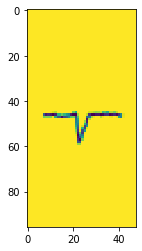

원본라벨:  0
예측라벨:  2


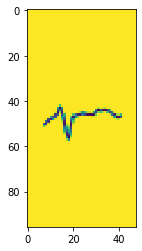

원본라벨:  0
예측라벨:  2


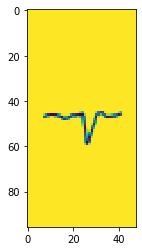

원본라벨:  0
예측라벨:  2


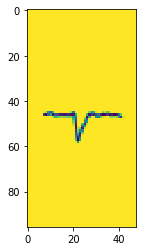

원본라벨:  0
예측라벨:  2


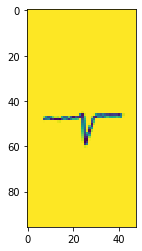

원본라벨:  0
예측라벨:  2


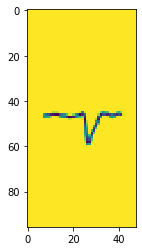

원본라벨:  0
예측라벨:  2


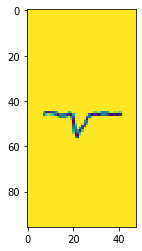

원본라벨:  0
예측라벨:  2


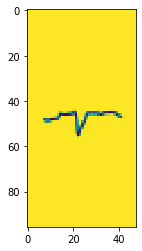

원본라벨:  0
예측라벨:  2


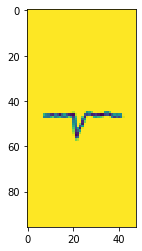

원본라벨:  0
예측라벨:  2


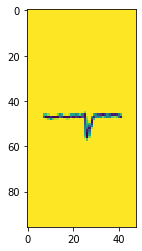

원본라벨:  0
예측라벨:  2


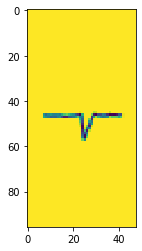

원본라벨:  0
예측라벨:  2


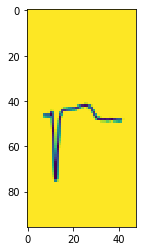

원본라벨:  0
예측라벨:  2


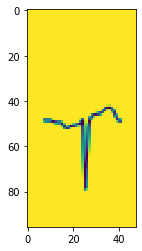

원본라벨:  0
예측라벨:  2
134


In [16]:
accuracy_score(y, pred_test)
cnt=0
for i in range(pred_test.shape[0]):
    if y[i] != pred_test[i]:
        cnt+=1
        plt.imshow(X_reshape[i].reshape(96, 48)) 
        plt.show()
        print('원본라벨: ', y[i])
        print('예측라벨: ', pred_test[i])
print(cnt)

# 라벨링 다양화 -> nor, up nor, down nor, pvc lbbb, pvc rbbb, vt lbbb, vt rbbb 

In [ ]:
rx=[]
ry=[]
lx=[]
ly=[]
nx=[]
ny=[]
for i in range(X.shape[0]):
    if y[i] == 0:
        nx.append(X[i])
        ny.append(0)
    elif y[i] == 1:
        rx.append(X[i])
        ry.append(1)
    elif y[i] == 2:
        lx.append(X[i])
        ly.append(2)
    
nx = np.array(nx)
ny=np.array(ny)

lx = np.array(lx)
ly=np.array(ly)

rx = np.array(rx)
ry=np.array(ry)

In [ ]:
nx_reshape = nx.reshape(nx.shape[0], 96, 48, 1)
lx_reshape = lx.reshape(lx.shape[0], 96, 48, 1)
rx_reshape = rx.reshape(rx.shape[0], 96, 48, 1)

pred_n = model.predict(nx_reshape)
pred_l = model.predict(lx_reshape)
pred_r = model.predict(rx_reshape)

In [ ]:
pred_n = np.argmax(pred_n, axis=-1)
pred_l = np.argmax(pred_l, axis=-1)
pred_r = np.argmax(pred_r, axis=-1)



In [ ]:
f1_n = f1_score(ny, pred_n, average="macro")
f1_l = f1_score(ly, pred_l, average="macro")
f1_r = f1_score(ry, pred_r, average="macro")

print("f1_nor", f1_n)
print("f1_lbbb", f1_l)
print("f1_rbbb",f1_r)
print(pred_n)
print(pred_l)
print(pred_r)
print(y.shape)
print(pred_n.shape)
print(pred_l.shape)
print(pred_r.shape)

In [46]:
accuracy_score(ry, pred_r)

0.9792060491493384

In [47]:
accuracy_score(ly, pred_l)

0.9472573839662447

In [48]:
accuracy_score(ny, pred_n)

0.9567901234567902

In [49]:
f1_score(ny, pred_n, average="macro")

0.32597266035751843

In [51]:

pred_test_ar = np.argmax(pred_test, axis=-1)
f1_score(y, pred_test_ar,average='macro') # 전체 데이터의 

0.9445951700681632

In [69]:
accuracy_score(y, pred_test_ar) 

0.959033934576582

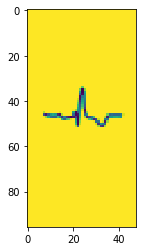

0


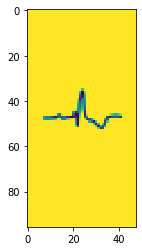

0


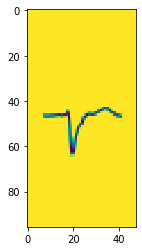

2


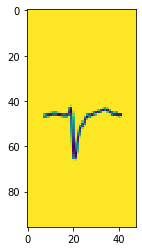

2


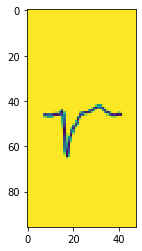

2


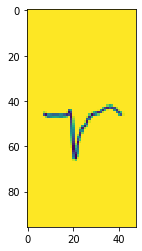

2


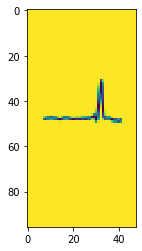

0


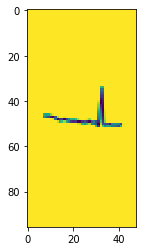

0


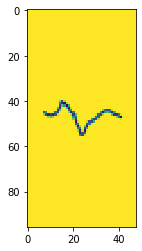

2


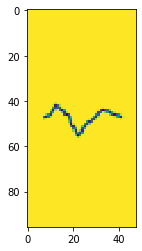

2


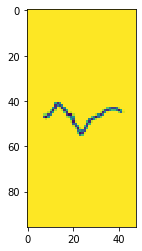

2
11


In [66]:
cnt=0
for i in range(pred_r.shape[0]):
    if pred_r[i] != 1:
        cnt+=1
        plt.imshow(rx[i].reshape(96, 48)) 
        plt.show()
        print(pred_r[i])
print(cnt)

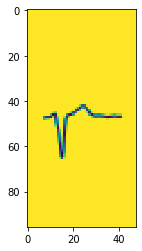

0


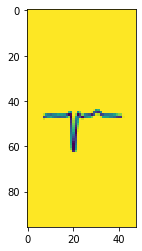

0


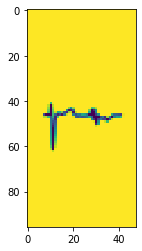

0


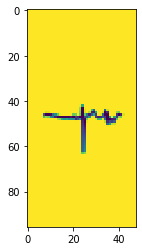

0


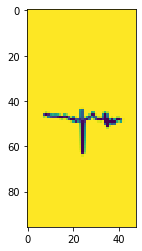

0


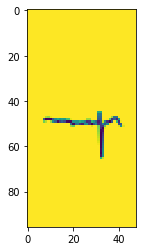

0


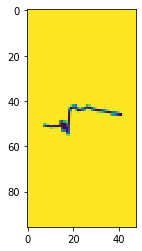

0


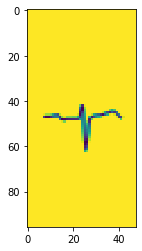

0


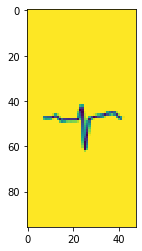

0


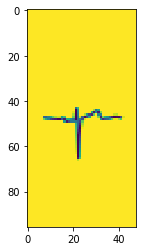

0


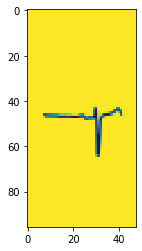

0


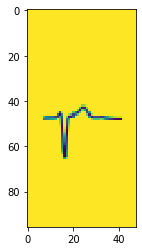

0


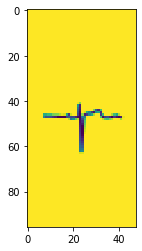

0


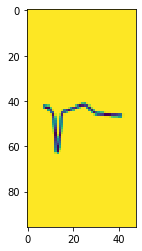

0


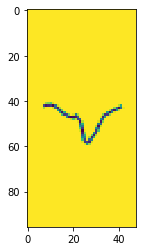

1


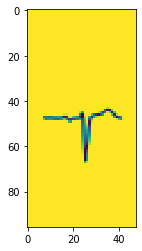

0


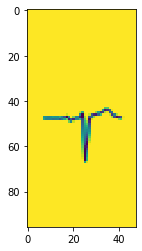

0


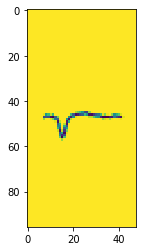

0


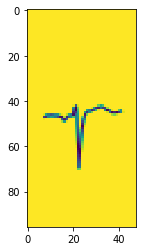

0


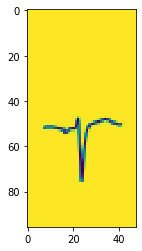

0


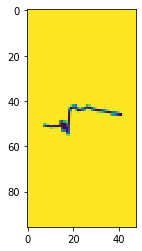

0


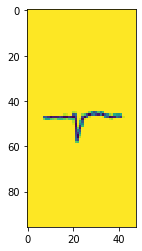

0


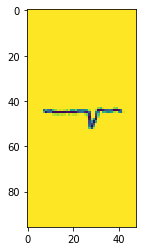

0


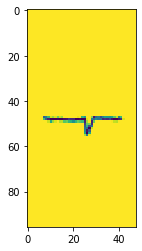

0


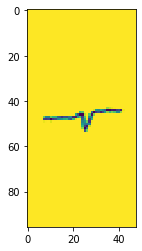

0
25


In [68]:
cnt=0
for i in range(pred_l.shape[0]):
    if pred_l[i] != 2:
        cnt+=1
        plt.imshow(lx[i].reshape(96, 48)) 
        plt.show()
        print(pred_l[i])
        
print(cnt)
        

In [70]:
tt = model.predict(rx_reshape)
print(tt)

[[8.0741323e-05 9.9983609e-01 8.3198654e-05]
 [1.6103364e-06 9.9999809e-01 2.4686878e-07]
 [1.3004417e-04 9.9986577e-01 4.2285546e-06]
 ...
 [9.7285656e-06 9.9998689e-01 3.3392355e-06]
 [3.5049293e-02 8.1686276e-01 1.4808789e-01]
 [7.2307899e-05 9.9899644e-01 9.3132287e-04]]


In [71]:
print(np.argmax(tt, axis=-1))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [17]:
Test = io.loadmat('./testImg_3D_half.mat')
X, y = Test['data'], Test['label']

In [22]:
X[0]

array([array([[[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        ...,

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]]],


       [[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
   